In [2]:
!pip install statsmodels

In [88]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statsmodels.api as sm1

In [89]:
df=pd.read_csv("AirQualityUCI.csv", sep=";")
df=df.drop(['Date','Time', 'Unnamed: 15', 'Unnamed: 16'],axis=1)
columns=(list(df))
print(columns)


['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [90]:
df.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
6,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
7,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
8,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"
9,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517"


In [91]:
#Removing Rows which have colum value =-200
print(df.shape)
df=df[df !=-200]
print(df.shape)

(9471, 13)
(9471, 13)


In [92]:
df.isna().sum()

CO(GT)            114
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          114
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 114
RH                114
AH                114
dtype: int64

In [93]:
df.dropna(inplace=True)

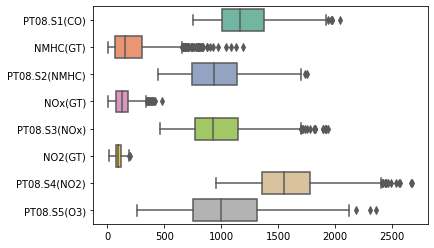

In [94]:
a1 = sns.boxplot(data=df , orient="h", palette="Set2")


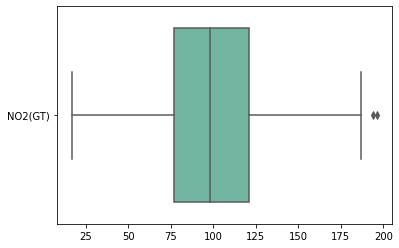

In [95]:
a1 = sns.boxplot(data=df[['CO(GT)','T','RH','AH','NO2(GT)']] , orient="h", palette="Set2")

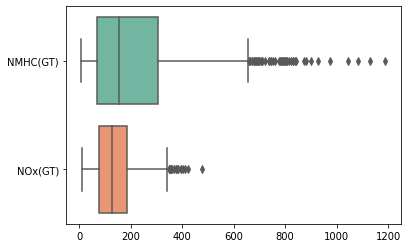

In [96]:
a1 = sns.boxplot(data=df[['NMHC(GT)','NOx(GT)']] , orient="h", palette="Set2")


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 1230
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         851 non-null    object 
 1   PT08.S1(CO)    851 non-null    float64
 2   NMHC(GT)       851 non-null    float64
 3   C6H6(GT)       851 non-null    object 
 4   PT08.S2(NMHC)  851 non-null    float64
 5   NOx(GT)        851 non-null    float64
 6   PT08.S3(NOx)   851 non-null    float64
 7   NO2(GT)        851 non-null    float64
 8   PT08.S4(NO2)   851 non-null    float64
 9   PT08.S5(O3)    851 non-null    float64
 10  T              851 non-null    object 
 11  RH             851 non-null    object 
 12  AH             851 non-null    object 
dtypes: float64(8), object(5)
memory usage: 93.1+ KB


In [98]:
int_columns = ["PT08.S2(NMHC)","NOx(GT)","PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","PT08.S1(CO)","NMHC(GT)"]

In [99]:
#z score helps us to describe SD and MEan of group of data points 
#in most case outliers lie outside 3,-3

z = np.abs(stats.zscore(df[int_columns]))
print(z)
print(z<3)

[[0.33287399 0.30678598 0.3013411  ... 0.57947999 0.65749685 0.36388943]
 [0.00527034 0.45850886 0.73432059 ... 0.16133494 0.37792928 0.54672464]
 [0.06472429 0.11837782 0.60956378 ... 0.09394588 0.83017093 0.6621995 ]
 ...
 [0.66730245 0.40396628 1.04529849 ... 1.08753887 0.70272101 0.06557937]
 [0.55954217 0.31893352 0.93888828 ... 0.86979935 0.84661608 0.23754216]
 [0.73790401 0.53758918 0.97191214 ... 1.88341436 0.92473055 0.23754216]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [100]:
#Removing values with grater than 3 Z values (outliers)
print(df.shape)
df = df[(z < 3).all(axis=1)]
print(df.shape)

(851, 13)
(823, 13)


In [101]:
df.describe()


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,1191.388821,216.120292,948.092345,137.573512,971.936817,98.653706,1580.852977,1024.650061
std,227.095609,190.067055,250.557313,75.759073,251.311511,30.282255,277.974113,374.116099
min,763.000000,11.000000,471.000000,14.000000,502.000000,20.000000,1036.000000,305.000000
25%,1008.000000,71.000000,745.500000,79.000000,779.500000,77.000000,1361.500000,756.000000
50%,1163.000000,151.000000,933.000000,125.000000,931.000000,98.000000,1547.000000,992.000000
75%,1355.000000,295.500000,1129.000000,181.000000,1141.500000,120.000000,1767.500000,1295.000000
max,1917.000000,840.000000,1610.000000,383.000000,1783.000000,186.000000,2488.000000,2108.000000


In [102]:
df.corr()


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
PT08.S1(CO),1.000000,0.772341,0.930059,0.914727,-0.838915,0.870428,0.937500,0.923794
NMHC(GT),0.772341,1.000000,0.874264,0.809372,-0.791434,0.735303,0.840417,0.745952
PT08.S2(NMHC),0.930059,0.874264,1.000000,0.920454,-0.920954,0.886255,0.951544,0.892588
NOx(GT),0.914727,0.809372,0.920454,1.000000,-0.822197,0.865613,0.899247,0.877671
PT08.S3(NOx),-0.838915,-0.791434,-0.920954,-0.822197,1.000000,-0.807653,-0.894843,-0.857083
NO2(GT),0.870428,0.735303,0.886255,0.865613,-0.807653,1.000000,0.805863,0.827926
PT08.S4(NO2),0.937500,0.840417,0.951544,0.899247,-0.894843,0.805863,1.000000,0.908341
PT08.S5(O3),0.923794,0.745952,0.892588,0.877671,-0.857083,0.827926,0.908341,1.000000


In [103]:
# # From the Corelation Matrix we can infer few things 
# - We find PT08.S5(O3) is strongly or moderately correlated with all gases. This observation
# can be attributed to the fact that ozone acts as catalyst to the reactions that result in the
# production of all these gases. This finding is also in line with that in [2].

# - CO(GT), PT08.S1(CO), C6H6(GT) and PT08.S2(NMHC) are not strongly correlated with
# nitrogen oxides measurements of both PT and the reference sensors but show strong
# correlation with parameters. This indicates existence of two groups one containing of all the
# hydrocarbon gases and the other containing Nitrogen oxides. This two groups are
# independent of each other.

# - The values of the new resistance sensors for NOx show fair correlation with the reference
# sensor values indicating that the new sensors are performing moderately well.

# - It is interesting to note PT08.S3(NOx) has negative yet a moderately strong correlation with
# NOx(GT) implying that the technology used in the new NOx sensors is different to exhibit
# consistently the same characteristic of NOx(GT) but in the negative form.  


In [104]:
import statsmodels.api as sm

In [105]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [108]:
y= df['NO2(GT)']


for_checking_cor = ['PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'PT08.S1(CO)',
 'NMHC(GT)']

x= df.drop(['NO2(GT)'], axis=1)[for_checking_cor]




modelAll = sm.OLS(y,x).fit()


In [109]:
modelAll.summary()
#from the sumary we can see that some variable are rrelated to NO2 
#by seeing that lot of variable have  low p value and F stat of overal model is 
# greater than 0 therefore null hypothesis can be elimnated 

#since T ,RH, AH, NMHC(GT), PT08.S3(NOx) has high p value and also correlation matrix also <0.8 we are going to 
#elimante from furtehr evaluation 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                NO2(GT)   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8804.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:29:13   Log-Likelihood:                         -3198.8
No. Observations:                 823   AIC:                                      6412.
Df Residuals:                     816   BIC:                                      6444.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PT08.S2(NMHC)     0.1217      0.007     16.444      0.000       0.107       0.136
NOx(GT)           0.0667      0.015      4.527      0.000       0.038       0.096
PT08.S3(NOx)      0.0099      0.002      4.168      0.000       0.005       0.015
PT08.S4(NO2)     -0.0722      0.005    -13.858      0.000      -0.082      -0.062
PT08.S5(O3)       0.0086      0.003      2.663      0.008       0.002       0.015
PT08.S1(CO)       0.0610      0.007      8.596      0.000       0.047       0.075
NMHC(GT)         -0.0138      0.005     -3.001      0.003      -0.023      -0.005
==============================================================================
Omnibus:                      121.973   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.045
Skew:                          -0.847   Prob(JB):                     2.51e-56
Kurtosis:                       5.144   Cond. No.                         97.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
def evaluateModel (model):
    print("RSS = ", ((y - model.predict())**2).sum())
    print("R2 = ", model.rsquared)


In [112]:

for col in for_checking_cor:
    x= df[col]
    model1 = sm.OLS(y,x).fit()
    print(col)
    evaluateModel(model1)
    print()
# Lowest Rss and highest R2 is PT08.S2(NMHC). Thereforere we choose This as our first input feature.    
X1='PT08.S2(NMHC)'
columns.remove('PT08.S2(NMHC)')

PT08.S2(NMHC)
RSS =  162177.6266762481
R2 =  0.9814943421385122

NOx(GT)
RSS =  687653.0284282244
R2 =  0.9215337409215373

PT08.S3(NOx)
RSS =  2185852.091673252
R2 =  0.7505782284934188

PT08.S4(NO2)
RSS =  303967.83280673414
R2 =  0.9653150386394007

PT08.S5(O3)
RSS =  324051.273648778
R2 =  0.9630233705929431

PT08.S1(CO)
RSS =  227943.6314458744
R2 =  0.9739899581607318

NMHC(GT)
RSS =  2275232.495037111
R2 =  0.7403792682664618



In [113]:
#forward Selection

for col in for_checking_cor:
    x= df[[col,X1]]
    model1 = sm.OLS(y,x).fit()
    print(col)
    evaluateModel(model1)
    print()
# Lowest Rss and highest R2 is NOx(GT) Thereforere we choose This as our first input feature.    
X2='NOx(GT)'
# columns.remove('NOx(GT)')

PT08.S2(NMHC)
RSS =  162177.6266762481
R2 =  0.9814943421385122

NOx(GT)
RSS =  153983.15285372164
R2 =  0.9824293917629423

PT08.S3(NOx)
RSS =  161891.16695173003
R2 =  0.981527029296178

PT08.S4(NO2)
RSS =  157105.29065896804
R2 =  0.9820731329175982

PT08.S5(O3)
RSS =  156704.82637105597
R2 =  0.9821188288329334

PT08.S1(CO)
RSS =  159317.8883529811
R2 =  0.9818206592765069

NMHC(GT)
RSS =  161243.5368511654
R2 =  0.9816009286453513



In [114]:
x= df[[X1,X2]]
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                NO2(GT)   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          2.295e+04
Date:                Sun, 07 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:31:33   Log-Likelihood:                         -3320.6
No. Observations:                 823   AIC:                                      6645.
Df Residuals:                     821   BIC:                                      6655.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PT08.S2(NMHC)     0.0932      0.002     53.342      0.000       0.090       0.097
NOx(GT)           0.0721      0.011      6.610      0.000       0.051       0.094
==============================================================================
Omnibus:                      111.113   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.190
Skew:                          -0.771   Prob(JB):                     1.15e-52
Kurtosis:                       5.144   Cond. No.                         22.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# features = "+".join(df[[X1,X2]])
# print(features)
# y='NO2(GT)~'
# # get y and X dataframes based on this regression:
# Y1, X1 = dmatrices(y + features, df, return_type='dataframe')
X1=df[[X1,X2]]
Y1=df['NO2(GT)']


In [116]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns


In [117]:
vif.round(1)
#since VIF factor> 10 indicating high collinearity between the two we have to use one of the 2 variables
#therefore we use one among the PTO8.S2(NMHC)


,VIF Factor,features
0,12.9,PT08.S2(NMHC)
1,12.9,NOx(GT)


In [118]:
# therefore linear regression is 
x= df['PT08.S2(NMHC)']
model = sm.OLS(y,x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                NO2(GT)   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          4.360e+04
Date:                Sun, 07 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:32:16   Log-Likelihood:                         -3341.9
No. Observations:                 823   AIC:                                      6686.
Df Residuals:                     822   BIC:                                      6691.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PT08.S2(NMHC)     0.1043      0.000    208.799      0.000       0.103       0.105
==============================================================================
Omnibus:                       36.279   Durbin-Watson:                   0.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.452
Skew:                          -0.356   Prob(JB):                     3.34e-13
Kurtosis:                       4.080   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

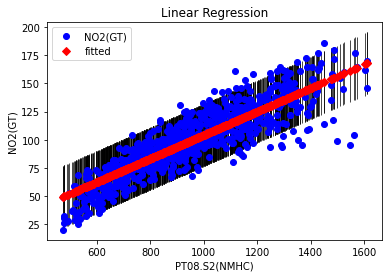

In [119]:
fig, ax = plt.subplots()
fig = sm1.graphics.plot_fit(model, 0, ax=ax)
ax.set_ylabel("NO2(GT)")
ax.set_xlabel("PT08.S2(NMHC)")
ax.set_title("Linear Regression")
plt.show()


In [120]:
# From the above graph and statistics, we can infer that:
# - Our linear regression model is properly fitted with R-squared value of 0.918.
# - F- statistic of 7419e+04 indicates that our model does not support null hypothesis.
# - The P value is almost 0 indicating that PT08.S5(O3) is another evidence against null
# hypothesis.